In [28]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')  # optional: for ggplot-like style

In [29]:
URL = 'https://raw.githubusercontent.com/Kushal997-das/THE-SPARKS-FOUNDATION/master/Prediction%20using%20Supervised%20ML/student_scores%20-%20student_scores.csv'
df = pd.read_csv(URL)
display(df.head())
display(df.tail())

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [30]:
df.shape

(25, 2)

In [31]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [45]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [56]:
df_hour = df.groupby(['Hours']).mean()
df_hour.reset_index(inplace = True)
df_hour.head()

,Hours,Scores
0,1.1,17.0
1,1.5,20.0
2,1.9,24.0
3,2.5,25.5
4,2.7,27.5


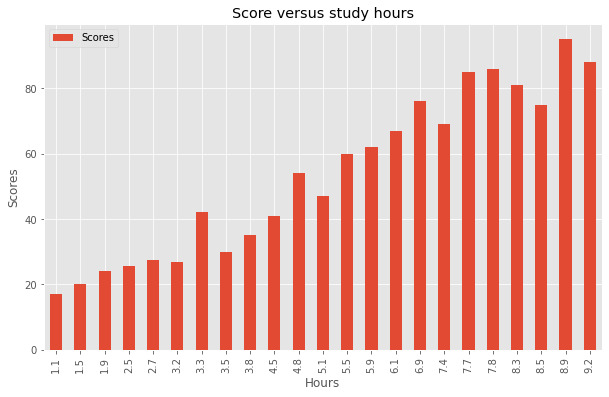

In [90]:
df_hour.plot(kind='bar',x='Hours',y='Scores',figsize=(10,6))

plt.xlabel('Hours') # add to x-label to the plot
plt.ylabel('Scores') # add y-label to the plot
plt.title('Score versus study hours') # add title to the plot
plt.show()

Text(0.5, 1.0, 'Score vs Hours')

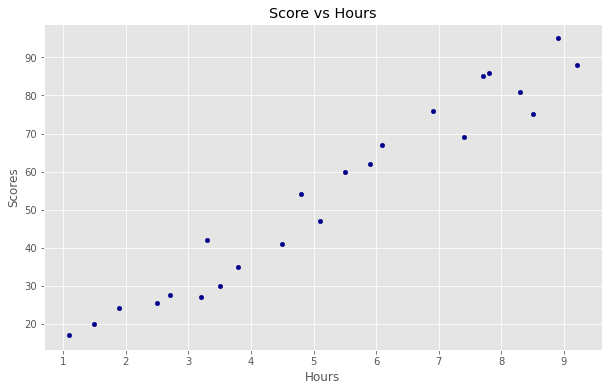

In [92]:
import matplotlib.pyplot as plt

df_hour.plot(kind='scatter', x='Hours', y='Scores',
             figsize=(10, 6), color='darkblue')

plt.title('Score vs Hours')             


In [61]:
#Prepare the data by splitting it into Training and Test set
from sklearn.model_selection import train_test_split

x_data = df_hour[['Hours']]
y_data = df_hour['Scores']

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)

print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 3
number of training samples: 20


<AxesSubplot:xlabel='Hours', ylabel='Scores'>

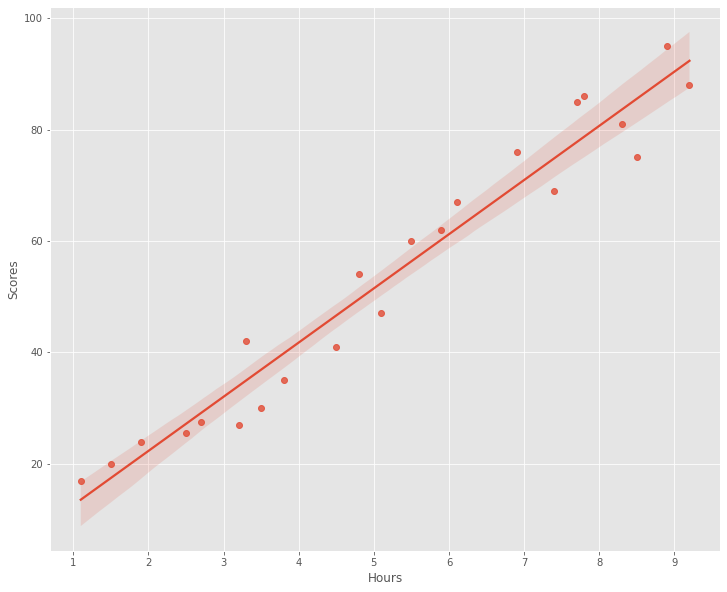

In [82]:
#Plot the regression line
from sklearn.linear_model import LinearRegression
import seaborn as sns

lre=LinearRegression()
lre.fit(x_train, y_train)
plt.figure(figsize=(12, 10))
sns.regplot(x="Hours", y="Scores", data=df_hour)


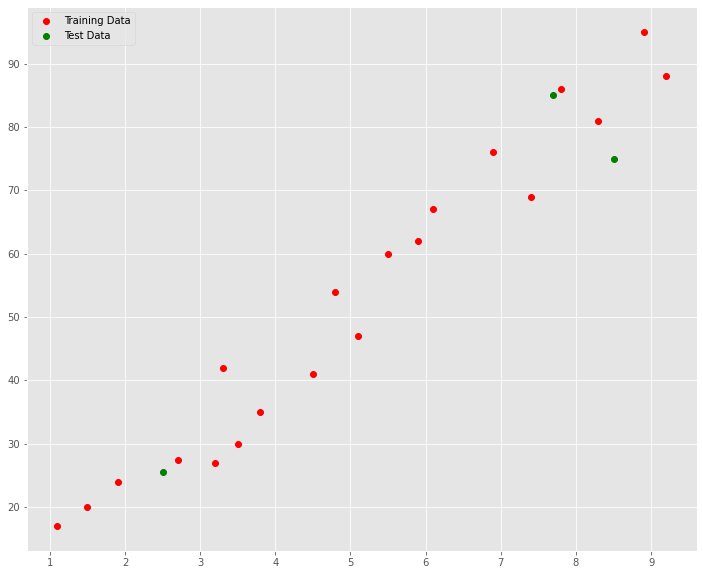

In [78]:
#Plot the training and test data .
import numpy as np
plt.figure(figsize=(12, 10))
plt.plot(x_train, y_train, 'ro', label='Training Data')
plt.plot(x_test, y_test, 'go', label='Test Data')
plt.legend()


C:\Users\Gary\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


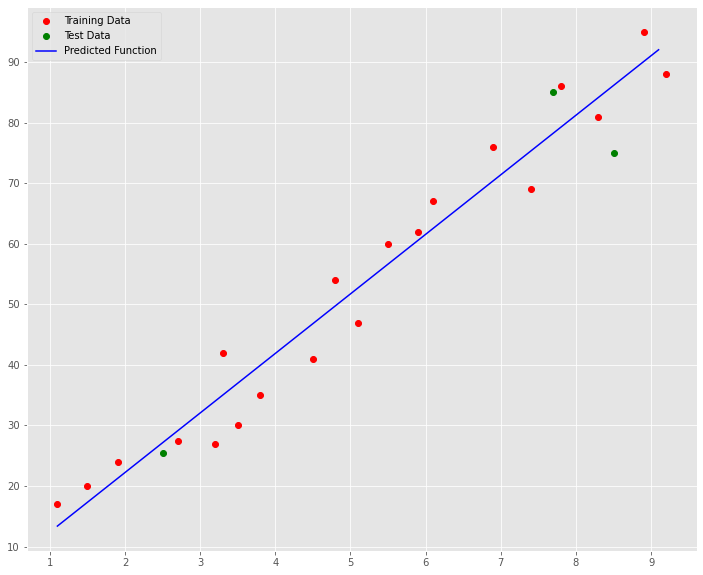

In [130]:
#Predict the score and compare predicted and actual score

xmax=max([x_train.values.max(), x_test.values.max()])
xmin=min([x_train.values.min(), x_test.values.min()])
x = np.arange(xmin, xmax, 0.1)
y_predict = lre.predict(pd.DataFrame(x))
plt.figure(figsize=(12, 10))
plt.plot(x_train, y_train, 'ro', label='Training Data')
plt.plot(x_test, y_test, 'go', label='Test Data')
plt.plot(x,y_predict,'b',label='Predicted Function')
plt.legend()


In [85]:
#Predict accuracy using r2square
lre.score(x_test,y_test)

0.9151794930944553

In [102]:
#Predict the percentage grade of a student if study hours are 9.25

lre.predict([[9.25]])[0]

C:\Users\Gary\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


93.52840565042126

In [126]:
#Evaluate the model: Calculate Mean absolute error, 
# mean squared error, root mean squared error
from sklearn import metrics
import math

MAE = metrics.mean_absolute_error(y_data.values,y_predict[0:len(y_data)])
MSE = metrics.mean_squared_error(y_data.values,y_predict[0:len(y_data)])
RMSE = math.sqrt(MSE)

print(MAE,MSE,RMSE)

29.448890232830333 1203.153337421387 34.68650079528616


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


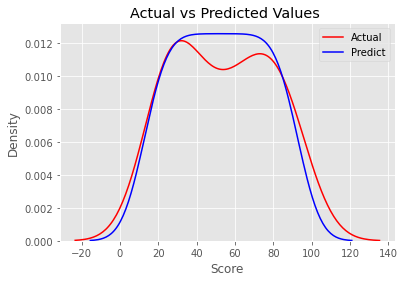

In [141]:
#Import seaborn and plot the distribution as well

import seaborn as sns
sns.distplot(y_data,hist=False,color='r',label='Actual')
sns.distplot(y_predict,hist=False,color='b',label='Predict')
plt.title('Actual vs Predicted Values ')
plt.xlabel('Score')
plt.legend()